<a href="https://colab.research.google.com/github/leticiaram/Modelos_Estocasticos_2023/blob/main/Codigo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Código 1: Capítulo 1

# Muestreo

In [ ]:
import random

## Con reemplazo

Generate n samples from a sequence with the possibility of repetition. Sample with replacement

In [ ]:
random.seed(1)
seq = range(10)
n = 20
sample_wr = random.choices(seq, k=n)

In [ ]:
sample_wr

[1, 8, 7, 2, 4, 4, 6, 7, 0, 0, 8, 4, 7, 0, 4, 7, 2, 9, 9, 0]

## Sin Reemplazo

Generate n unique samples (multiple items) from a sequence without repetition. Here, A seq can be a list, set, string, tuple. Sample without replacement.

In [ ]:
random.seed(10)
seq = range(30)
n = 20
sample_wtr = random.sample(seq, n)

In [ ]:
sample_wtr

[18, 1, 13, 15, 29, 0, 6, 14, 26, 8, 5, 28, 16, 21, 10, 25, 3, 11, 19, 24]

# Variables aleatorias discretas

## Distribución Binomial

In [65]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

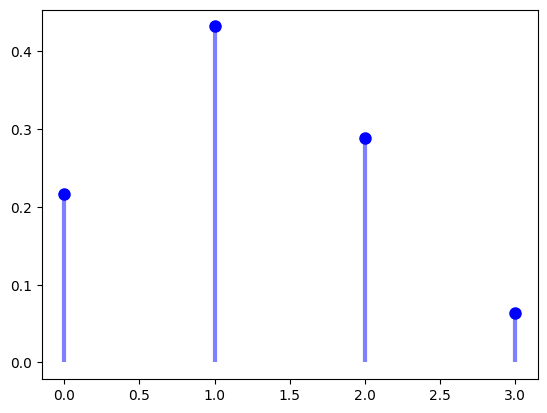

In [68]:
n, p = 3, 0.4
x = np.arange(0,n+1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=3, alpha=0.5)

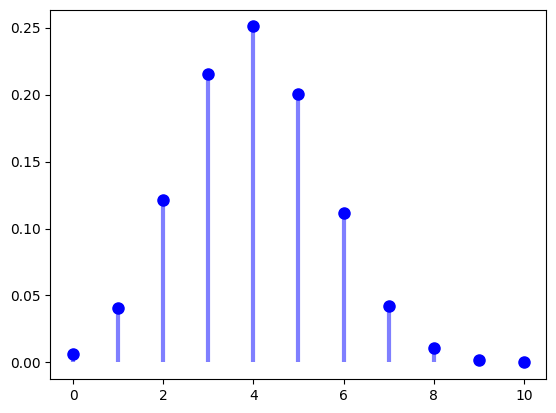

In [69]:
n, p = 10, 0.4
x = np.arange(0,n+1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=3, alpha=0.5)


## Distribución Poisson



In [ ]:
#import pandas as pd
#import scipy.stats as stats
#import seaborn as sns

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [71]:
k = np.arange(0, 17)
print(k)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


### Función de Densidad de Probabilidad (Probability Mass Function, PMS)


In [89]:
pmf = poisson.pmf(k, mu=7)
pmf = np.round(pmf, 5)
print(pmf)

[0.00091 0.00638 0.02234 0.05213 0.09123 0.12772 0.149   0.149   0.13038
 0.1014  0.07098 0.04517 0.02635 0.01419 0.00709 0.00331 0.00145]


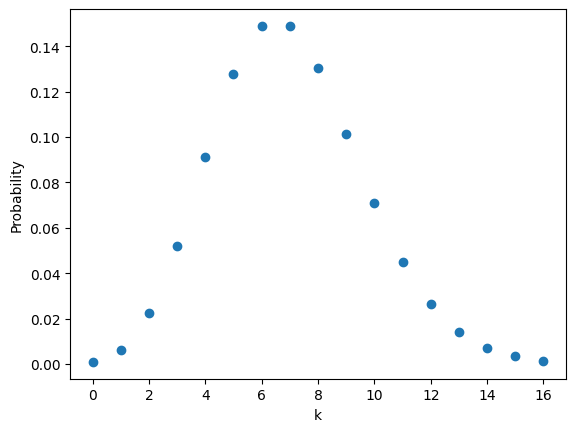

In [90]:
plt.plot(k, pmf,'o')
plt.xlabel('k')
plt.ylabel('Probability')

plt.show()

In [91]:
my_list = []
for i in range(len(k)):
  my_list.append([(k[i], 0), (k[i], pmf[i])])
print(my_list)

[[(0, 0), (0, 0.00091)], [(1, 0), (1, 0.00638)], [(2, 0), (2, 0.02234)], [(3, 0), (3, 0.05213)], [(4, 0), (4, 0.09123)], [(5, 0), (5, 0.12772)], [(6, 0), (6, 0.149)], [(7, 0), (7, 0.149)], [(8, 0), (8, 0.13038)], [(9, 0), (9, 0.1014)], [(10, 0), (10, 0.07098)], [(11, 0), (11, 0.04517)], [(12, 0), (12, 0.02635)], [(13, 0), (13, 0.01419)], [(14, 0), (14, 0.00709)], [(15, 0), (15, 0.00331)], [(16, 0), (16, 0.00145)]]


In [92]:
import pylab as pl
from matplotlib import collections  as mc

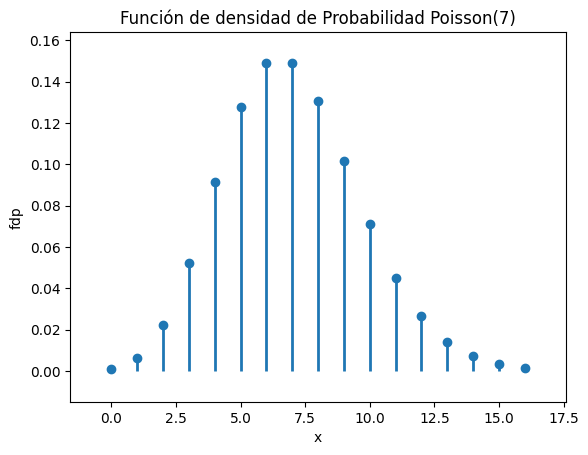

In [93]:
lc = mc.LineCollection(my_list, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
plt.plot(k, pmf,'o')
plt.xlabel('x')
plt.ylabel('fdp')
plt.title('Función de densidad de Probabilidad Poisson(7)')
ax.autoscale()
ax.margins(0.1)

### Función de Distribución (Cumulative Distribution Function)

In [77]:
cdf = poisson.cdf(k, mu=7)
cdf = np.round(cdf, 3)

print(cdf)

[0.001 0.007 0.03  0.082 0.173 0.301 0.45  0.599 0.729 0.83  0.901 0.947
 0.973 0.987 0.994 0.998 0.999]


In [78]:
my_list_cdf = []
for i in range(len(k)-1):
  my_list_cdf.append([(k[i], cdf[i]), (k[i+1], cdf[i])])
print(my_list_cdf)

[[(0, 0.001), (1, 0.001)], [(1, 0.007), (2, 0.007)], [(2, 0.03), (3, 0.03)], [(3, 0.082), (4, 0.082)], [(4, 0.173), (5, 0.173)], [(5, 0.301), (6, 0.301)], [(6, 0.45), (7, 0.45)], [(7, 0.599), (8, 0.599)], [(8, 0.729), (9, 0.729)], [(9, 0.83), (10, 0.83)], [(10, 0.901), (11, 0.901)], [(11, 0.947), (12, 0.947)], [(12, 0.973), (13, 0.973)], [(13, 0.987), (14, 0.987)], [(14, 0.994), (15, 0.994)], [(15, 0.998), (16, 0.998)]]


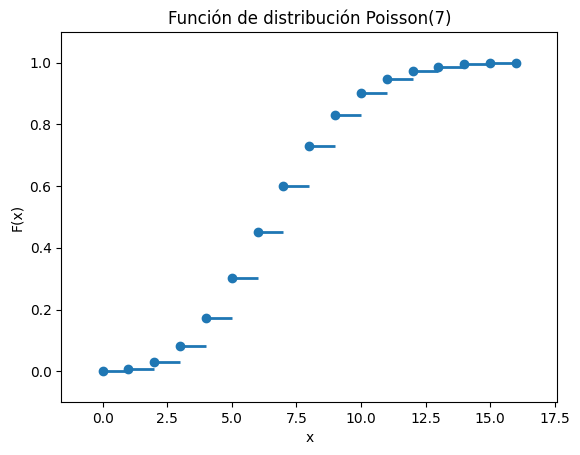

In [95]:
lc = mc.LineCollection(my_list_cdf, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
plt.plot(k, cdf, 'o')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Función de distribución Poisson(7)')
ax.autoscale()
ax.margins(0.1)

### Aproximación de la Binomial a la Poisson

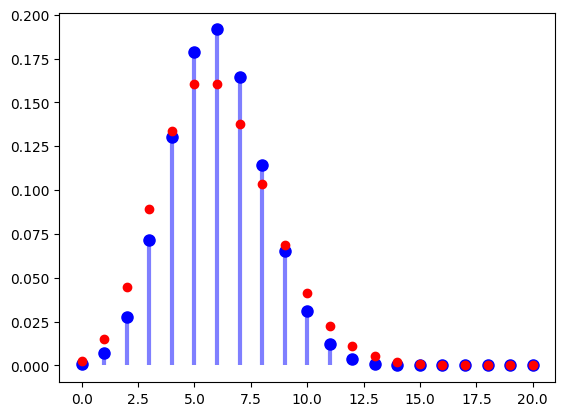

In [304]:
n, p = 20, 0.3
x = np.arange(0,n+1)

pmf = poisson.pmf(x, mu=n*p)

fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=3, alpha=0.5)

plt.plot(x, pmf,'ro')

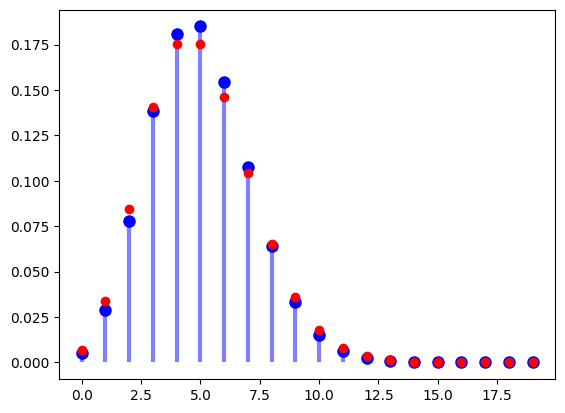

In [83]:
n, p = 50, 0.1

#x = np.arange(0,n+1)
x = np.arange(0,20)

pmf = poisson.pmf(x, mu=n*p)

fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=3, alpha=0.5)

plt.plot(x, pmf,'ro')

# Variables aleatorias continuas

## Distribucion Uniforme

### Función de Densidad (Probability Density Function, PDF)

In [96]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Función de densidad de Unif(0,1)')

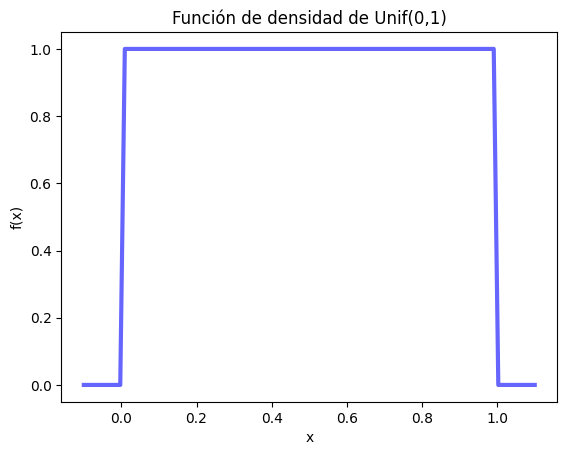

In [98]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-0.1,1.1, 100)
ax.plot(x, uniform.pdf(x),'b-', lw=3, alpha=0.6, label='uniform pdf')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función de densidad de Unif(0,1)')

Text(0.5, 1.0, 'Función de densidad de Unif(0.1,0.9)')

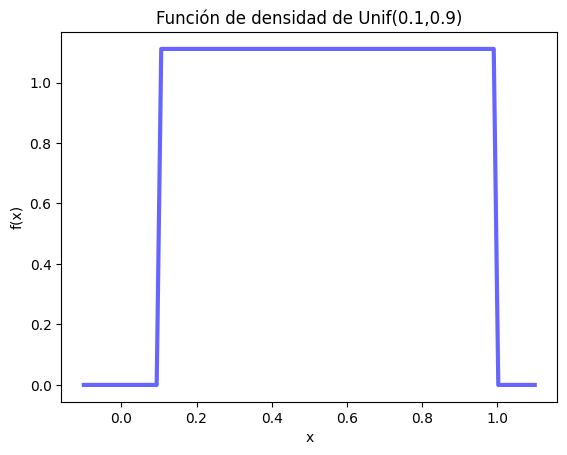

In [99]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-0.1,1.1, 100)
ax.plot(x, uniform.pdf(x,0.1,0.9),'b-', lw=3, alpha=0.6, label='uniform pdf')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función de densidad de Unif(0.1,0.9)')

### Función de Distribución

Text(0.5, 1.0, 'Función de distribución Unif(0,1)')

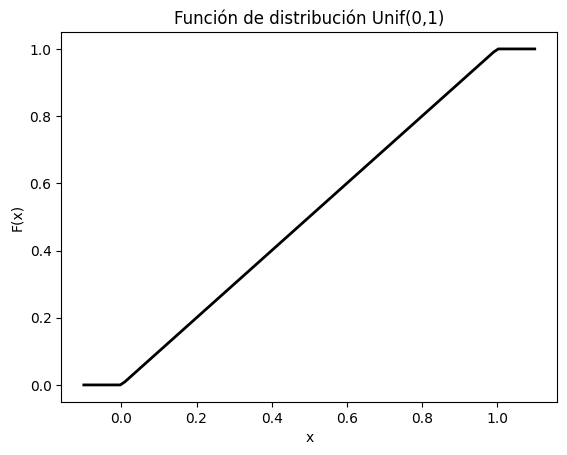

In [100]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, uniform.cdf(x), 'k-', lw=2, label='frozen pdf')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Función de distribución Unif(0,1)')

## Distribución Gaussiana

### Función de Densidad (Probability Density Function, PDF)

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Función de densidad de N(0,1)')

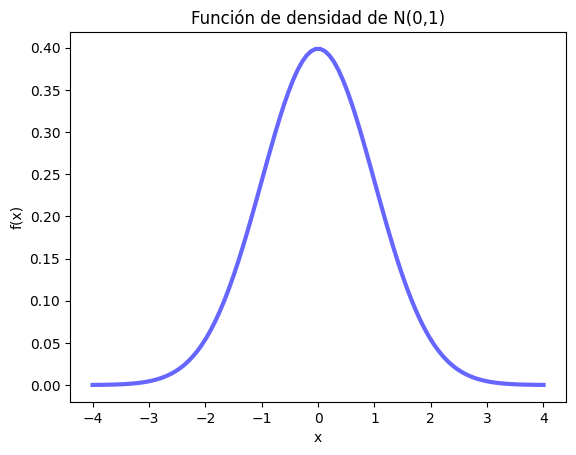

In [102]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-4, 4, 100)
ax.plot(x, norm.pdf(x),'b-', lw=3, alpha=0.6, label='norm pdf')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función de densidad de N(0,1)')

Text(0.5, 1.0, 'Función de densidad de N(2,0.5)')

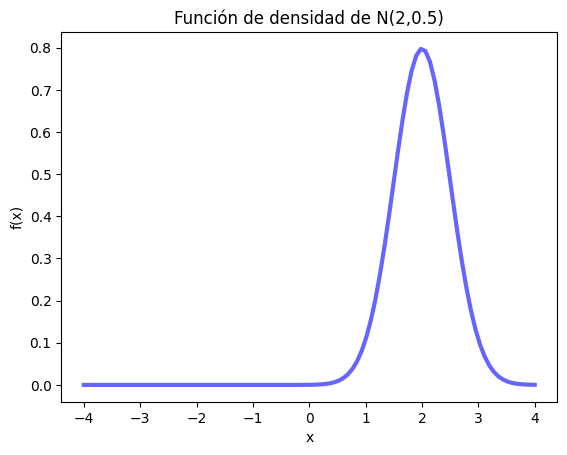

In [103]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-4, 4, 100)
ax.plot(x, norm.pdf(x, loc=2, scale=0.5),'b-', lw=3, alpha=0.6, label='norm pdf')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función de densidad de N(2,0.5)')

### Función de Distribución

Text(0.5, 1.0, 'Función de distribución N(0,1)')

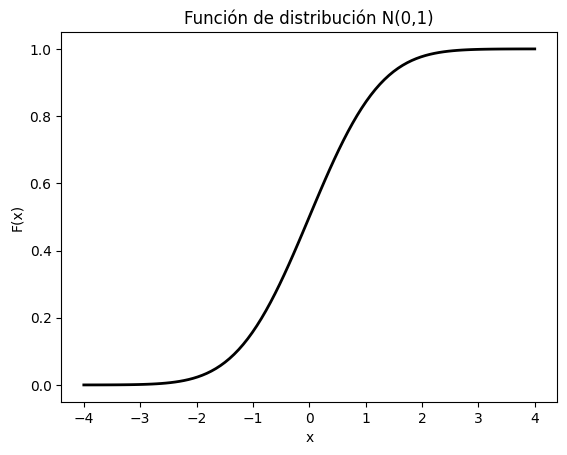

In [104]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.cdf(x), 'k-', lw=2, label='frozen pdf')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Función de distribución N(0,1)')

Text(0.5, 1.0, 'Función de distribución N(2,0.5)')

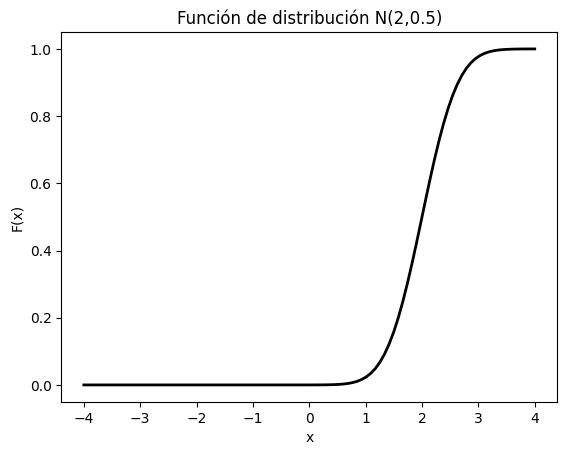

In [105]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.cdf(x,loc=2,scale=0.5), 'k-', lw=2, label='frozen pdf')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Función de distribución N(2,0.5)')

## Distribución Exponencial

### Función de Densidad (Probability Density Function, PDF)

In [7]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Función de densidad de Exp(1)')

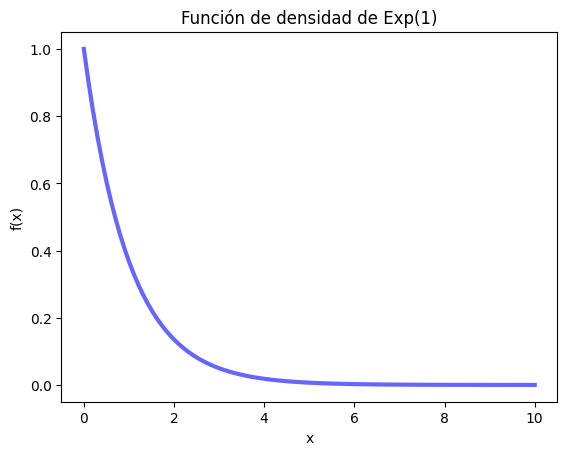

In [106]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 10, 100)
ax.plot(x, expon.pdf(x), 'b-', lw=3, alpha=0.6, label='expon pdf')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función de densidad de Exp(1)')

scale = 1 / lambda

Text(0.5, 1.0, 'Función de densidad de Exp(2.7)')

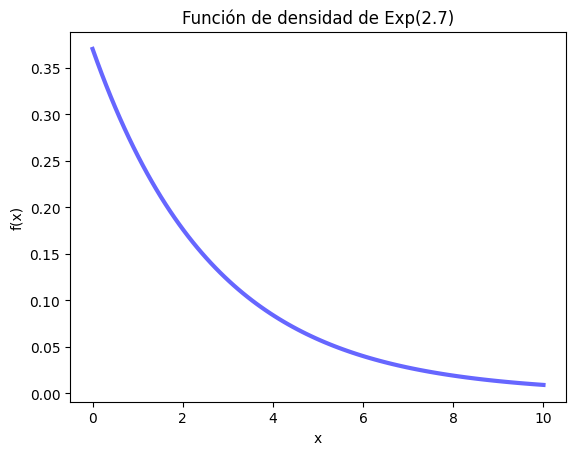

In [107]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 10, 100)
ax.plot(x, expon.pdf(x,scale=2.7), 'b-', lw=3, alpha=0.6, label='expon pdf')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función de densidad de Exp(2.7)')

### Función de Distribución

Text(0.5, 1.0, 'Función de distribución Exp(1)')

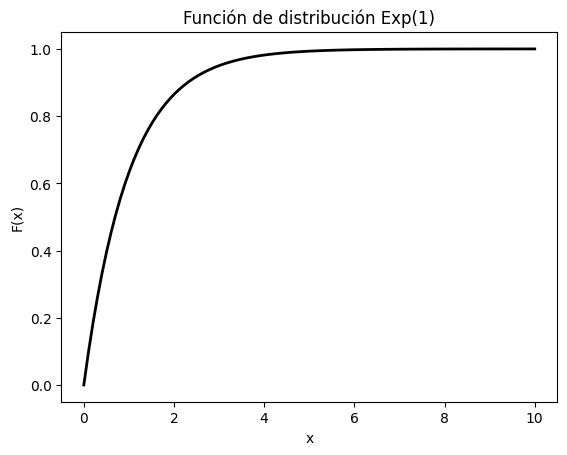

In [108]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, expon.cdf(x), 'k-', lw=2)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Función de distribución Exp(1)')

Text(0.5, 1.0, 'Función de distribución Exp(2.7)')

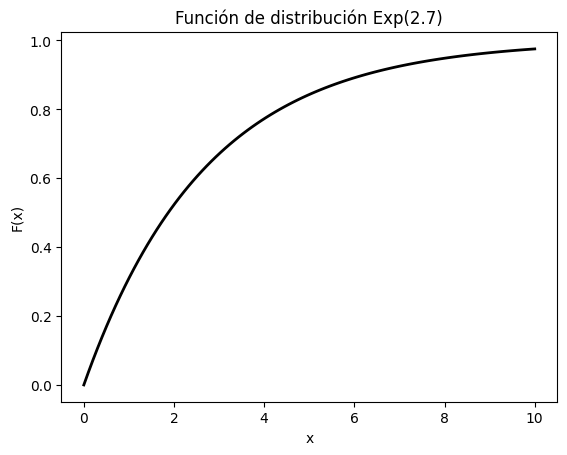

In [109]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, expon.cdf(x,scale=2.7), 'k-', lw=2)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Función de distribución Exp(2.7)')

# Funciones de Variables Aleatorias


## Distribución lognormal

In [110]:
import numpy as np
from scipy.stats import norm
from scipy.stats import lognorm
import matplotlib.pyplot as plt

In [111]:
size = 1000
simulaciones = norm.rvs(size=size)

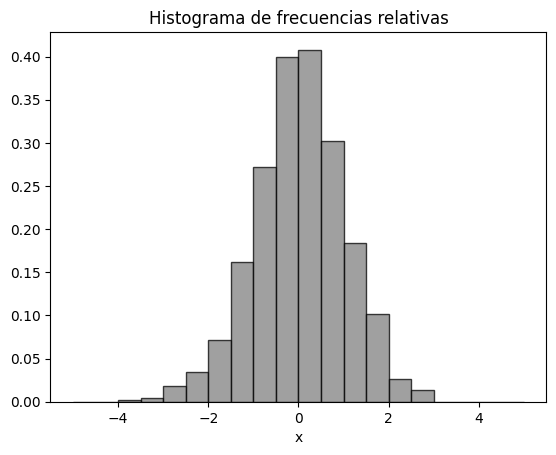

In [112]:
# Graficar el histograma
plt.hist(simulaciones, bins=20, range=(-5, 5), density=True, alpha=0.75, color='grey', edgecolor='black')
plt.xlabel('x')
plt.title('Histograma de frecuencias relativas')
plt.show()

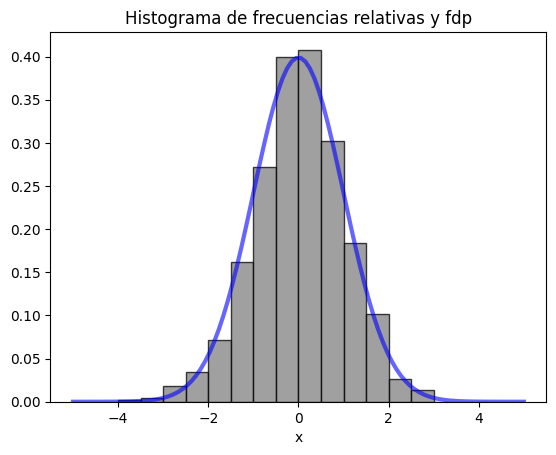

In [113]:
x = np.linspace(-5, 5, 100)

# Graficar el histograma y fdp
plt.plot(x, norm.pdf(x),'b-', lw=3, alpha=0.6, label='norm pdf')
plt.hist(simulaciones, bins=20, range=(-5, 5), density=True, alpha=0.75, color='grey', edgecolor='black')
plt.xlabel('x')
plt.title('Histograma de frecuencias relativas y fdp')
plt.show()

In [26]:
exp_simulaciones=np.exp(simulaciones)

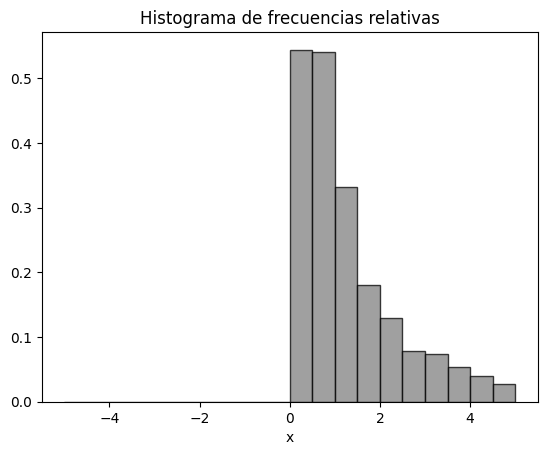

In [114]:
# Graficar el histograma
plt.hist(exp_simulaciones, bins=20, range=(-5, 5), density=True, alpha=0.75, color='grey', edgecolor='black')
plt.xlabel('x')
plt.title('Histograma de frecuencias relativas')
plt.show()

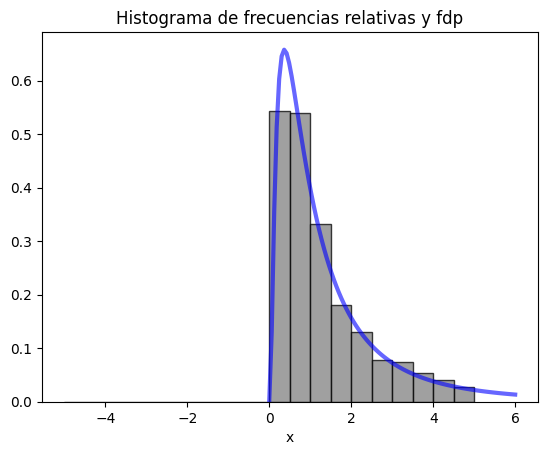

In [115]:
x = np.linspace(0, 6, 100)

# Graficar el histograma
plt.plot(x, lognorm.pdf(x,s=1),'b-', lw=3, alpha=0.6, label='lognorm pdf')
plt.hist(exp_simulaciones, bins=20, range=(-5, 5), density=True, alpha=0.75, color='grey', edgecolor='black')
plt.xlabel('x')
plt.title('Histograma de frecuencias relativas y fdp')
plt.show()

## Estadísticas de orden

### Ejemplo con vaiid Unif(0,1)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n = 10
m = 1000
np.random.seed(42)
# Generar el arreglo nxm con variables aleatorias uniformes en el intervalo (0, 1)
arreglo = np.random.uniform(0, 1, (n, m))

In [144]:
Xn = np.max(arreglo, axis=0)

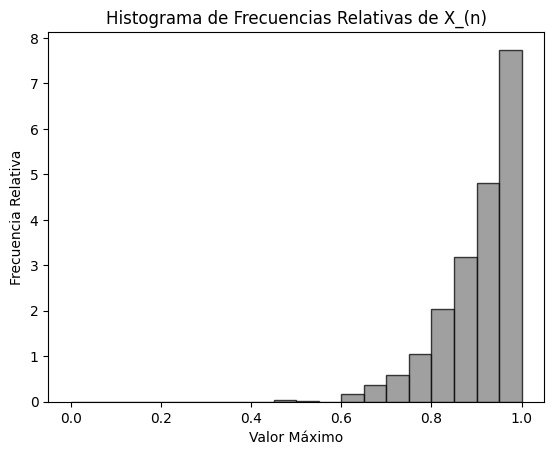

In [24]:
# Graficar el histograma
plt.hist(Xn, bins=20, range=(0, 1), density=True, alpha=0.75, color='grey', edgecolor='black')
plt.xlabel('Valor Máximo')
plt.ylabel('Frecuencia Relativa')
plt.title('Histograma de Frecuencias Relativas de X_(n)')
#plt.grid(True)
plt.show()



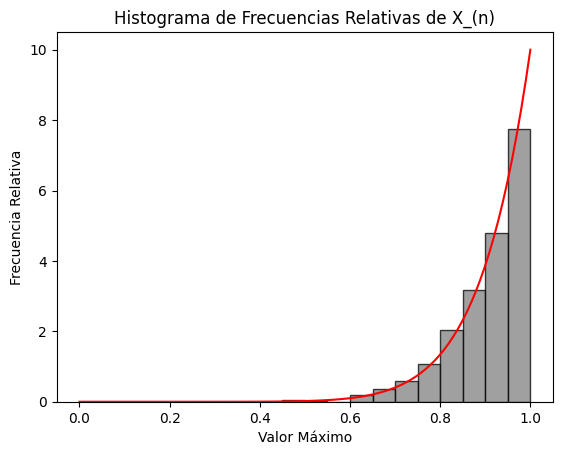

In [25]:
# Definir la función de densidad de la n-ésima estadística de orden
x = np.linspace(0, 1, 100)
Xn_pdf = n*x**(n-1)

# Graficar la curva de la función
plt.plot(x, Xn_pdf, 'r-', label='N-ésima estadística de orden')
plt.hist(Xn, bins=20, range=(0, 1), density=True, alpha=0.75, color='grey', edgecolor='black')
plt.xlabel('Valor Máximo')
plt.ylabel('Frecuencia Relativa')
plt.title('Histograma de Frecuencias Relativas de X_(n)')
#plt.grid(True)
plt.show()

In [27]:
X1 = np.min(arreglo, axis=0)

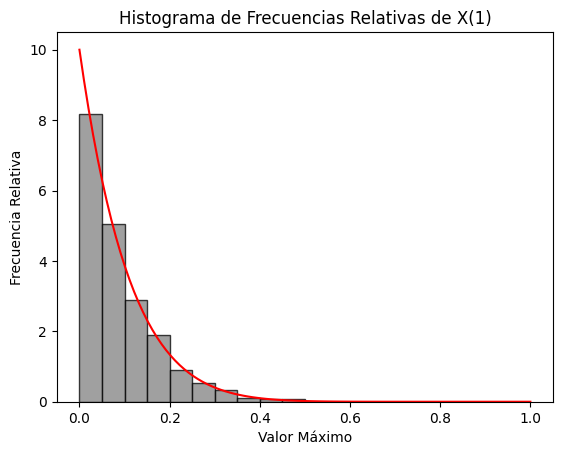

In [29]:
# Definir la función de densidad de la primera estadística de orden
x = np.linspace(0, 1, 100)
X1_pdf = n*(1-x)**(n-1)

# Graficar la curva de la función
plt.plot(x, X1_pdf, 'r-', label='Primera estadística de orden')
plt.hist(X1, bins=20, range=(0, 1), density=True, alpha=0.75, color='grey', edgecolor='black')
plt.xlabel('Valor Máximo')
plt.ylabel('Frecuencia Relativa')
plt.title('Histograma de Frecuencias Relativas de X_(1)')
#plt.grid(True)
plt.show()

# Teoremas Límite

## TCL

### Ejemplo Xi's uniformes(0,1)

In [271]:
import numpy as np
import matplotlib.pyplot as plt

In [272]:
n = 100
m = 1000
np.random.seed(42)
# Generar el arreglo nxm con variables aleatorias uniformes en el intervalo (0, 1)
arreglo = np.random.uniform(-1, 1, (n, m))

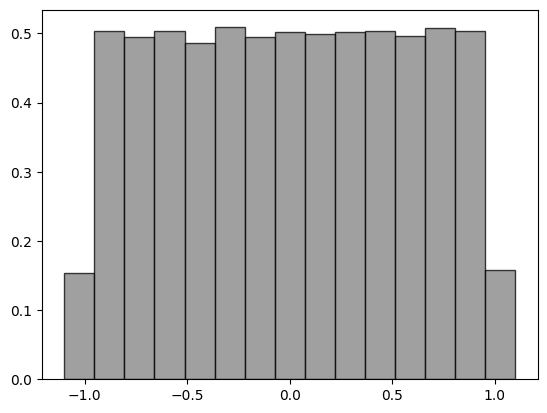

In [273]:
plt.hist(np.random.uniform(-1, 1, size = n*m), bins=15, range=(-1.1, 1.1), density=True, alpha=0.75, color='grey', edgecolor='black')
plt.show()

In [274]:
xbarra = np.average(arreglo, axis=0)
len(xbarra)

1000

In [275]:
xbarra[0]

-0.06121071996806202

In [276]:
np.average(arreglo[0:1000,0])

-0.061210719968062044

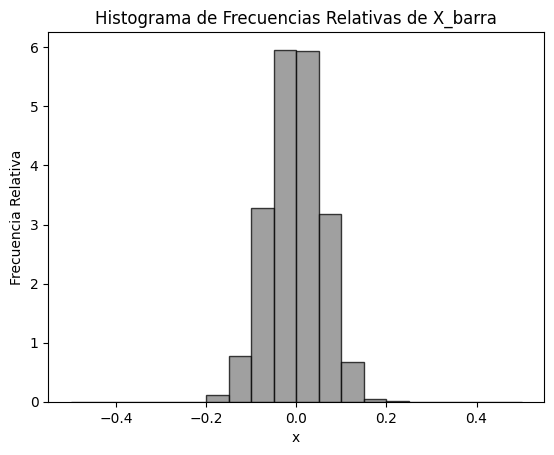

In [277]:
plt.hist(xbarra, bins=20, range=(-0.5, 0.5), density=True, alpha=0.75, color='grey', edgecolor='black')
plt.xlabel('x')
plt.ylabel('Frecuencia Relativa')
plt.title('Histograma de Frecuencias Relativas de X_barra')
plt.show()

In [278]:
muestra_estandarizada = np.sqrt(n)*(xbarra-0)/np.sqrt(2**2/12)

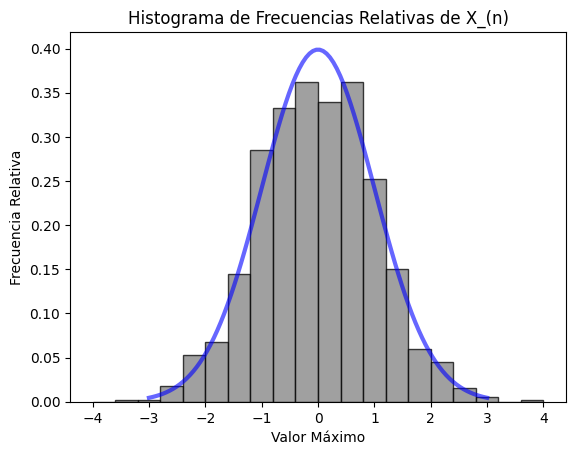

In [280]:
x = np.linspace(-3, 3, 100)

# Graficar el histograma y fdp
plt.plot(x, norm.pdf(x),'b-', lw=3, alpha=0.6, label='norm pdf')
plt.hist(muestra_estandarizada, bins=20, range=(-4, 4), density=True, alpha=0.75, color='grey', edgecolor='black')
plt.xlabel('Valor Máximo')
plt.ylabel('Frecuencia Relativa')
plt.title('Histograma de Frecuencias Relativas de X_(n)')
#plt.grid(True)
plt.show()

### Ejemplo Xi's exponenciales

In [281]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

In [282]:
n = 100
m = 1000
np.random.seed(42)
# Generar el arreglo nxm con variables aleatorias exponenciales(1)
arreglo = expon.rvs(scale=1, size=(n, m))

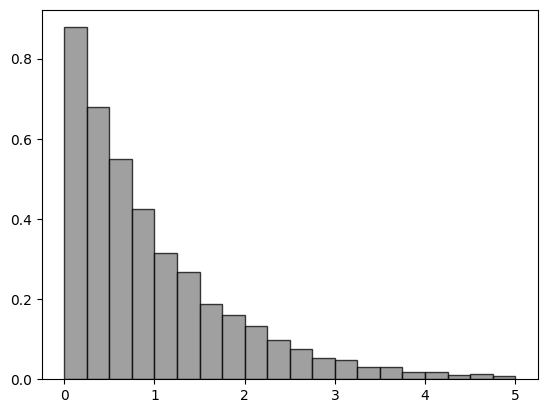

In [188]:
plt.hist(expon.rvs(scale=1, size=n*m), bins=20, range=(0, 5), density=True, alpha=0.75, color='grey', edgecolor='black')
plt.show()

In [283]:
xbarra = np.average(arreglo, axis=0)
len(xbarra)

1000

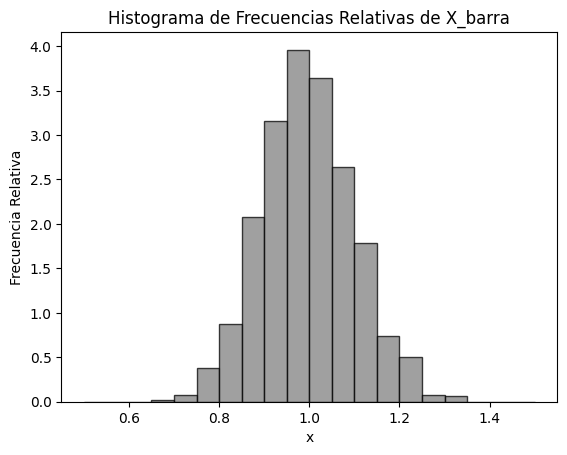

In [284]:
plt.hist(xbarra, bins=20, range=(0.5, 1.5), density=True, alpha=0.75, color='grey', edgecolor='black')
plt.xlabel('x')
plt.ylabel('Frecuencia Relativa')
plt.title('Histograma de Frecuencias Relativas de X_barra')
plt.show()

In [285]:
muestra_estandarizada = np.sqrt(n)*(xbarra -1)/1

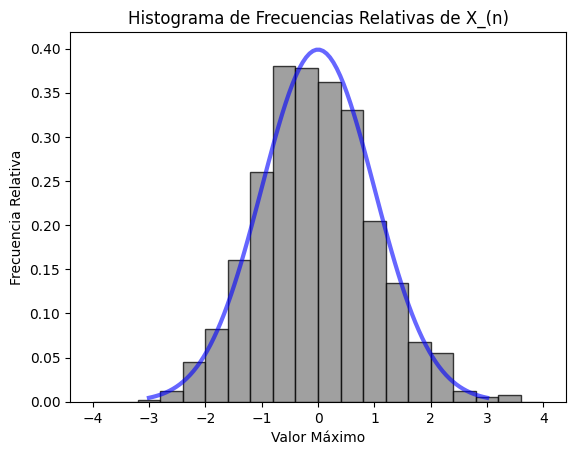

In [287]:
x = np.linspace(-3, 3, 100)

# Graficar el histograma y fdp
plt.plot(x, norm.pdf(x),'b-', lw=3, alpha=0.6, label='norm pdf')
plt.hist(muestra_estandarizada, bins=20, range=(-4, 4), density=True, alpha=0.75, color='grey', edgecolor='black')
plt.xlabel('Valor Máximo')
plt.ylabel('Frecuencia Relativa')
plt.title('Histograma de Frecuencias Relativas de X_(n)')
#plt.grid(True)
plt.show()

### Ejemplo Xi's Poisson

In [288]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [342]:
n = 100
m = 1000
np.random.seed(42)
# Generar el arreglo nxm con variables aleatorias exponenciales(1)
arreglo = poisson.rvs(7, size=(n, m))

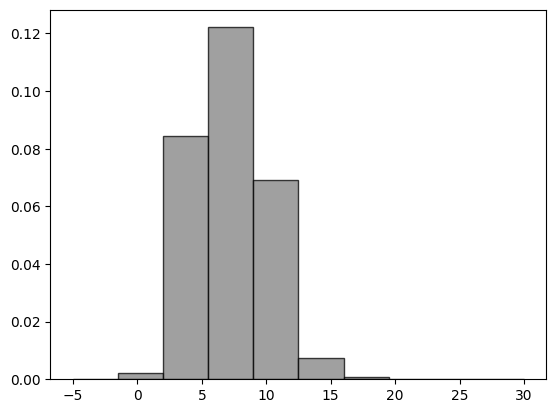

In [343]:
w = plt.hist(poisson.rvs(7, size=n*m), bins=10, range=(-5, 30), density=True, alpha=0.75, color='grey', edgecolor='black')
plt.show()

In [344]:
unique, counts = np.unique(poisson.rvs(7, size=n*m), return_counts=True)
unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [345]:
freq = counts/(n*m)
freq

array([1.1600e-03, 6.6200e-03, 2.2390e-02, 5.1480e-02, 9.1520e-02,
       1.2791e-01, 1.5145e-01, 1.4731e-01, 1.2987e-01, 1.0046e-01,
       7.0920e-02, 4.4970e-02, 2.6660e-02, 1.4710e-02, 6.6500e-03,
       3.4500e-03, 1.6400e-03, 5.4000e-04, 2.0000e-04, 9.0000e-05])

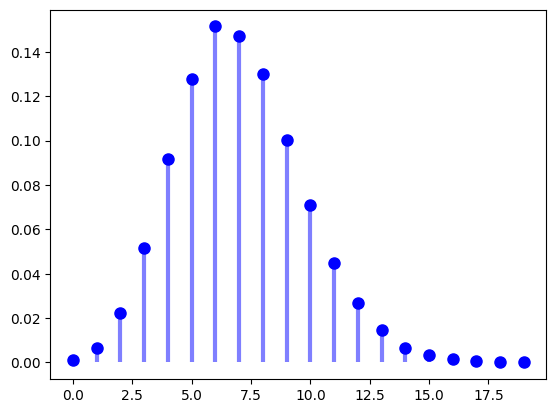

In [346]:
fig, ax = plt.subplots(1, 1)
ax.plot(unique,freq, 'bo', ms=8, label='xbar')
ax.vlines(unique, 0, freq, colors='b', lw=3, alpha=0.5)

In [347]:
xbarra = np.average(arreglo, axis=0)
len(xbarra)

1000

In [351]:
unique, counts = np.unique(xbarra, return_counts=True)
freq = counts/m

In [352]:
np.sum(freq)

1.0

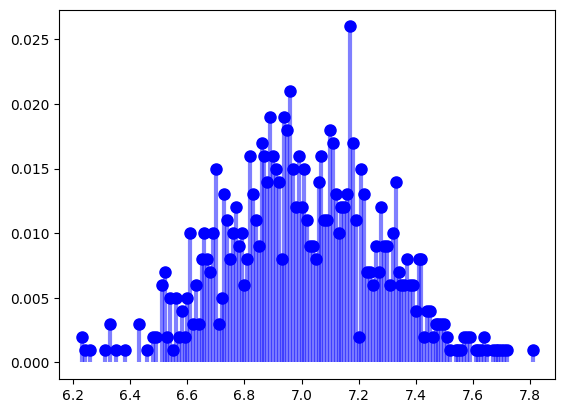

In [353]:
fig, ax = plt.subplots(1, 1)
ax.plot(unique, freq, 'bo', ms=8, label='xbar')
ax.vlines(unique, 0, freq, colors='b', lw=3, alpha=0.5)

In [354]:
muestra_estandarizada = np.sqrt(n)*(xbarra -7)/np.sqrt(7)
unique, counts = np.unique(muestra_estandarizada, return_counts=True)
freq = counts/n

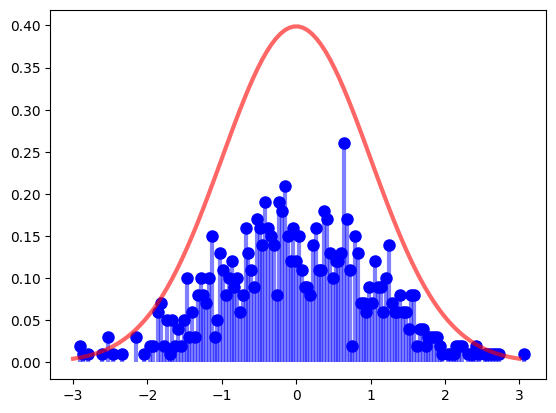

In [355]:
fig, ax = plt.subplots(1, 1)
ax.plot(unique, freq, 'bo', ms=8, label='xbar')
ax.vlines(unique, 0, freq, colors='b', lw=3, alpha=0.5)
x = np.linspace(-3, 3, 100)
plt.plot(x, norm.pdf(x),'r-', lw=3, alpha=0.6, label='norm pdf')

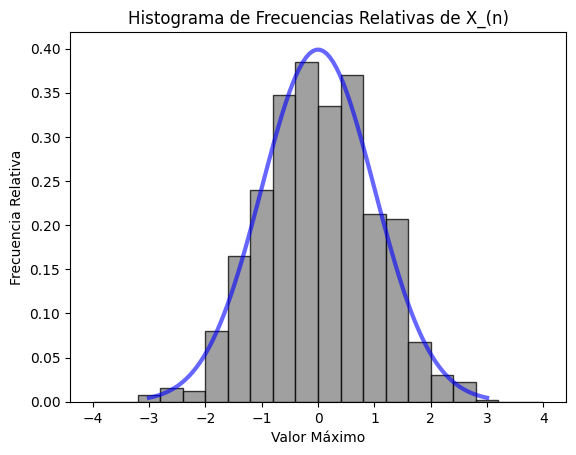

In [356]:
x = np.linspace(-3, 3, 100)

# Graficar el histograma y fdp
plt.plot(x, norm.pdf(x),'b-', lw=3, alpha=0.6, label='norm pdf')
plt.hist(muestra_estandarizada, bins=20, range=(-4, 4), density=True, alpha=0.75, color='grey', edgecolor='black')
plt.xlabel('Valor Máximo')
plt.ylabel('Frecuencia Relativa')
plt.title('Histograma de Frecuencias Relativas de X_(n)')
#plt.grid(True)
plt.show()

# Simulación de Variables Aleatorias